In [ ]:
## Unsupvervised

In [1]:
# Principle Component Analysis
# Load the Boston House Price dataset using sklearn.datasets.load_boston
from sklearn.datasets import load_boston
boston = load_boston()

In [3]:
import matplotlib.pyplot as plt

In [6]:
X = boston['data']
y = boston['target']
print(x.shape)

(506, 13)


In [7]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X) #wrong way, data needs to scaled beforehand
print(pca.n_components_)
print(boston.feature_names)
print(pca.explained_variance_)
print(pca.components_)

13
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
[3.08895182e+04 6.25027401e+03 8.18365244e+02 2.66683023e+02
 5.01347040e+01 2.78967669e+01 1.61009055e+01 9.53431045e+00
 3.27329483e+00 1.18108745e+00 2.55106135e-01 6.01011611e-02
 3.05352042e-03]
[[ 2.90793419e-02 -4.35901380e-02  2.83311855e-02 -5.55834285e-05
   4.49723983e-04 -1.16817521e-03  8.36340851e-02 -6.56167701e-03
   4.50056441e-02  9.49748862e-01  5.60015636e-03 -2.91215007e-01
   2.29433981e-02]
 [ 5.95358534e-03  1.17454545e-03 -4.94881025e-03 -1.02672761e-04
   1.83085404e-06  3.65743217e-04 -5.72142592e-03  3.53613793e-04
  -8.61821319e-03 -2.92380996e-01 -2.52890005e-03 -9.56193028e-01
   5.76700106e-03]
 [-1.15545558e-02  6.32896919e-01 -8.83404215e-02 -9.75318528e-04
  -1.80719024e-03  4.73411947e-03 -7.55862402e-01  4.50884909e-02
   2.84762034e-03  9.38666635e-02 -1.11591438e-02 -2.35542195e-02
  -9.28331511e-02]
 [ 2.70010188e-02  7.68061562e-01 -1.27967832e-02  8.544864

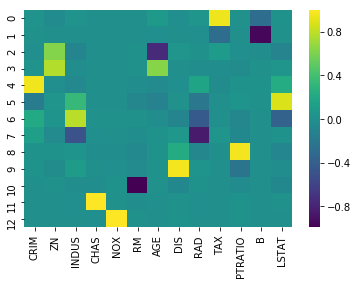

In [8]:
import seaborn as sns

sns.heatmap(pca.components_,cmap='viridis',
           xticklabels=boston['feature_names'])

In [9]:
print(boston['DESCR'])

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

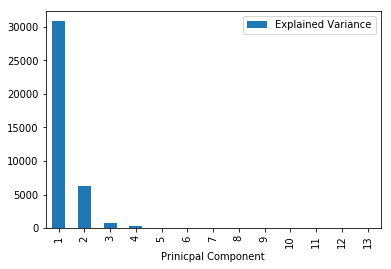

In [13]:
import pandas as pd

var = pd.DataFrame(pca.explained_variance_,
                  columns=['Explained Variance'])
var.index = var.index + 1
var.index.name = "Prinicpal Component"
var.plot(kind='bar')

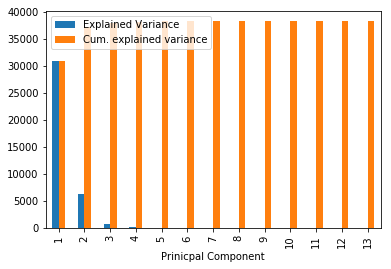

In [14]:
var["Cum. explained variance"] = var['Explained Variance'].cumsum()
var.plot(kind="bar")

In [25]:
# PCA with scaling

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
print(X_scaled)

[[0.00000000e+00 1.80000000e-01 6.78152493e-02 ... 2.87234043e-01
  1.00000000e+00 8.96799117e-02]
 [2.35922539e-04 0.00000000e+00 2.42302053e-01 ... 5.53191489e-01
  1.00000000e+00 2.04470199e-01]
 [2.35697744e-04 0.00000000e+00 2.42302053e-01 ... 5.53191489e-01
  9.89737254e-01 6.34657837e-02]
 ...
 [6.11892474e-04 0.00000000e+00 4.20454545e-01 ... 8.93617021e-01
  1.00000000e+00 1.07891832e-01]
 [1.16072990e-03 0.00000000e+00 4.20454545e-01 ... 8.93617021e-01
  9.91300620e-01 1.31070640e-01]
 [4.61841693e-04 0.00000000e+00 4.20454545e-01 ... 8.93617021e-01
  1.00000000e+00 1.69701987e-01]]


In [26]:
pca = PCA()
pca.fit(X_scaled) 
print(pca.n_components_)
print(boston.feature_names)
print(pca.explained_variance_)
print(pca.components_)

13
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
[0.41637866 0.09769941 0.06649974 0.04876105 0.03820158 0.02936225
 0.02525885 0.01901635 0.01083284 0.00854034 0.00704979 0.00632254
 0.00487724]
[[ 0.08977195 -0.20478626  0.32688082  0.00652683  0.30707528 -0.07855719
   0.3330181  -0.22249794  0.51611298  0.45332817  0.18145771 -0.17924753
   0.21284136]
 [-0.06763677 -0.37246636  0.17472139  0.29177529  0.22927148 -0.04145279
   0.47529946 -0.27600013 -0.47778547 -0.3244053  -0.15092491  0.13231242
   0.10421923]
 [ 0.00890943  0.24254819 -0.02933357  0.84398846  0.06663109  0.16356822
  -0.08256186  0.01570669  0.22028895  0.11381631 -0.31524539 -0.02253821
  -0.16818914]
 [ 0.03316135  0.30501799 -0.00150274 -0.35087416  0.24576965  0.11205753
   0.14695945 -0.06535772 -0.0764046   0.00292087 -0.67416219 -0.47131723
   0.03795144]
 [ 0.01814778 -0.14955947 -0.0195654   0.2490743  -0.13740118 -0.13020709
  -0.15295018  0.08617757 -0.16331974

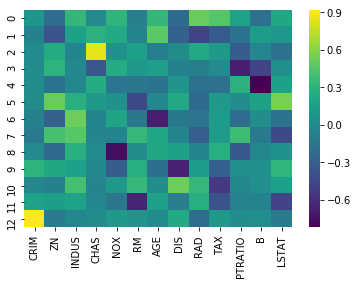

In [27]:
import seaborn as sns

sns.heatmap(pca.components_,cmap='viridis',
           xticklabels=boston['feature_names'])

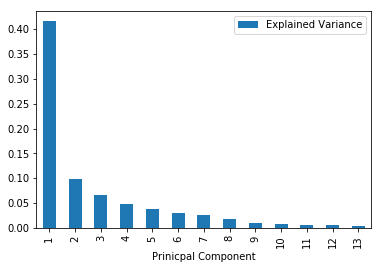

In [28]:
import pandas as pd

var = pd.DataFrame(pca.explained_variance_,
                  columns=['Explained Variance'])
var.index = var.index + 1
var.index.name = "Prinicpal Component"
var.plot(kind='bar')

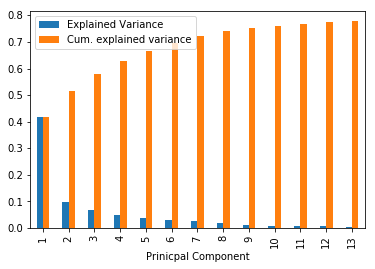

In [24]:
var["Cum. explained variance"] = var['Explained Variance'].cumsum()
var.plot(kind="bar")

In [29]:
# Clustering
from sklearn.cluster import KMeans  

kmeans = KMeans(n_clusters=3)
kmeans.fit(X_scaled)



KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [30]:
kmeans.labels_

array([2, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       0, 2, 0, 0, 2, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,

In [37]:
df = pd.DataFrame(X, columns = boston['feature_names'])
df['cluster_kmeans'] = kmeans.labels_
# Mean values of clusters
df.groupby('cluster_kmeans').mean()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
cluster_kmeans,,,,,,,,,,,,,
0,0.661506,1.94709,11.513333,0.111111,0.574593,6.260053,83.569841,3.004364,4.656085,330.656085,17.943386,373.082910,13.287884
1,12.226169,0.00000,18.451825,0.058394,0.670102,6.006212,89.967883,2.054470,23.270073,667.642336,20.196350,291.039051,18.674526
2,0.102407,29.90000,5.173833,0.033333,0.445965,6.522356,36.547778,5.950024,4.244444,292.261111,17.668333,389.400222,7.403500


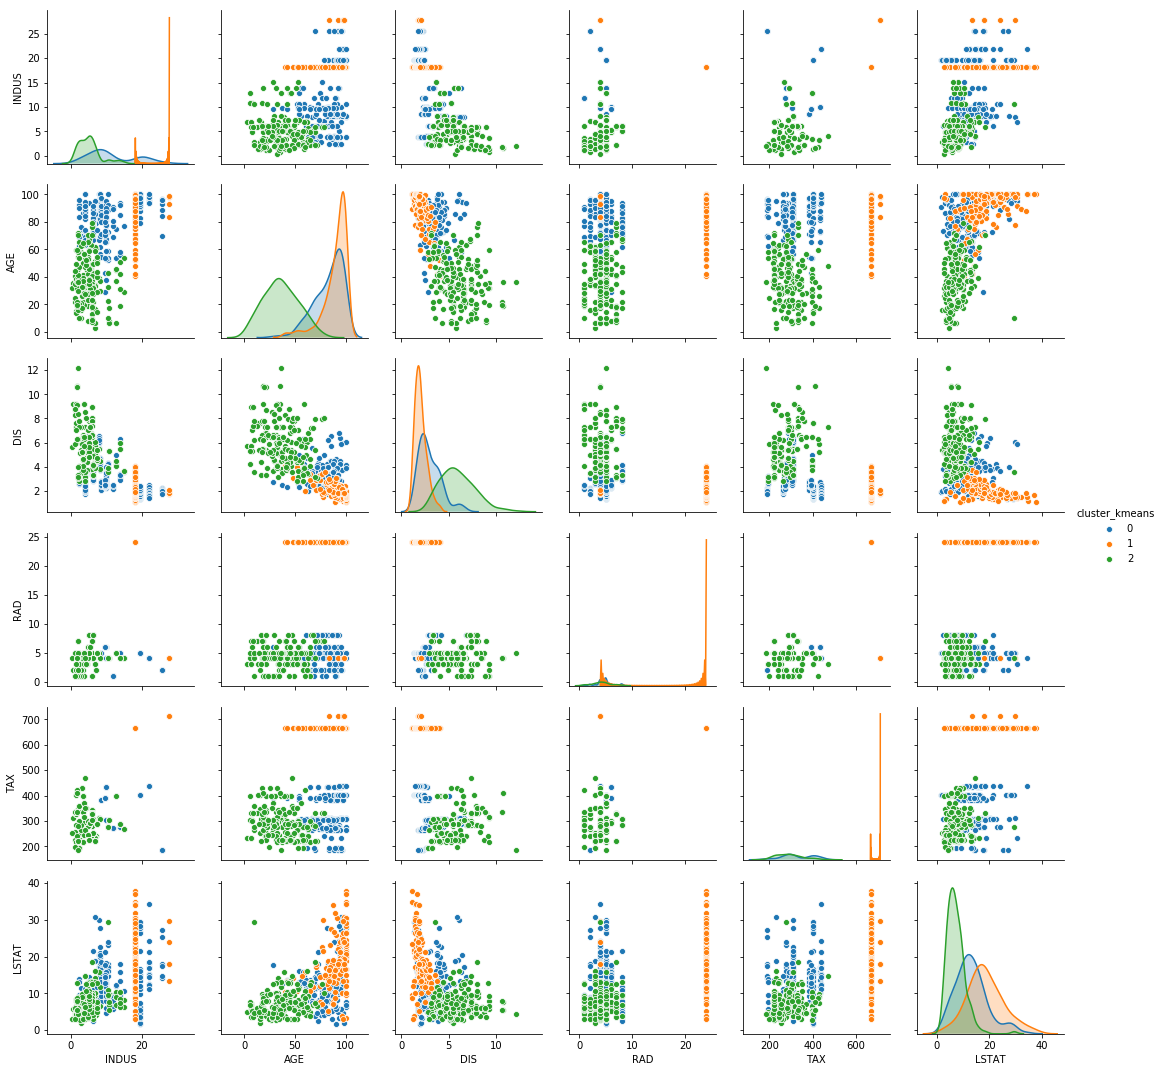

In [49]:
import seaborn as sns

cols = ['INDUS','AGE','DIS','RAD','TAX','LSTAT']
sns.pairplot(df,vars=cols, hue='cluster_kmeans')

## Agglomerative Clustering

In [62]:
from sklearn.cluster import AgglomerativeClustering
agg = AgglomerativeClustering(n_clusters=3, linkage = "complete")

In [63]:
agg.fit(X_scaled)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='complete', memory=None,
            n_clusters=3, pooling_func=<function mean at 0x10e9cb6a8>)

/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


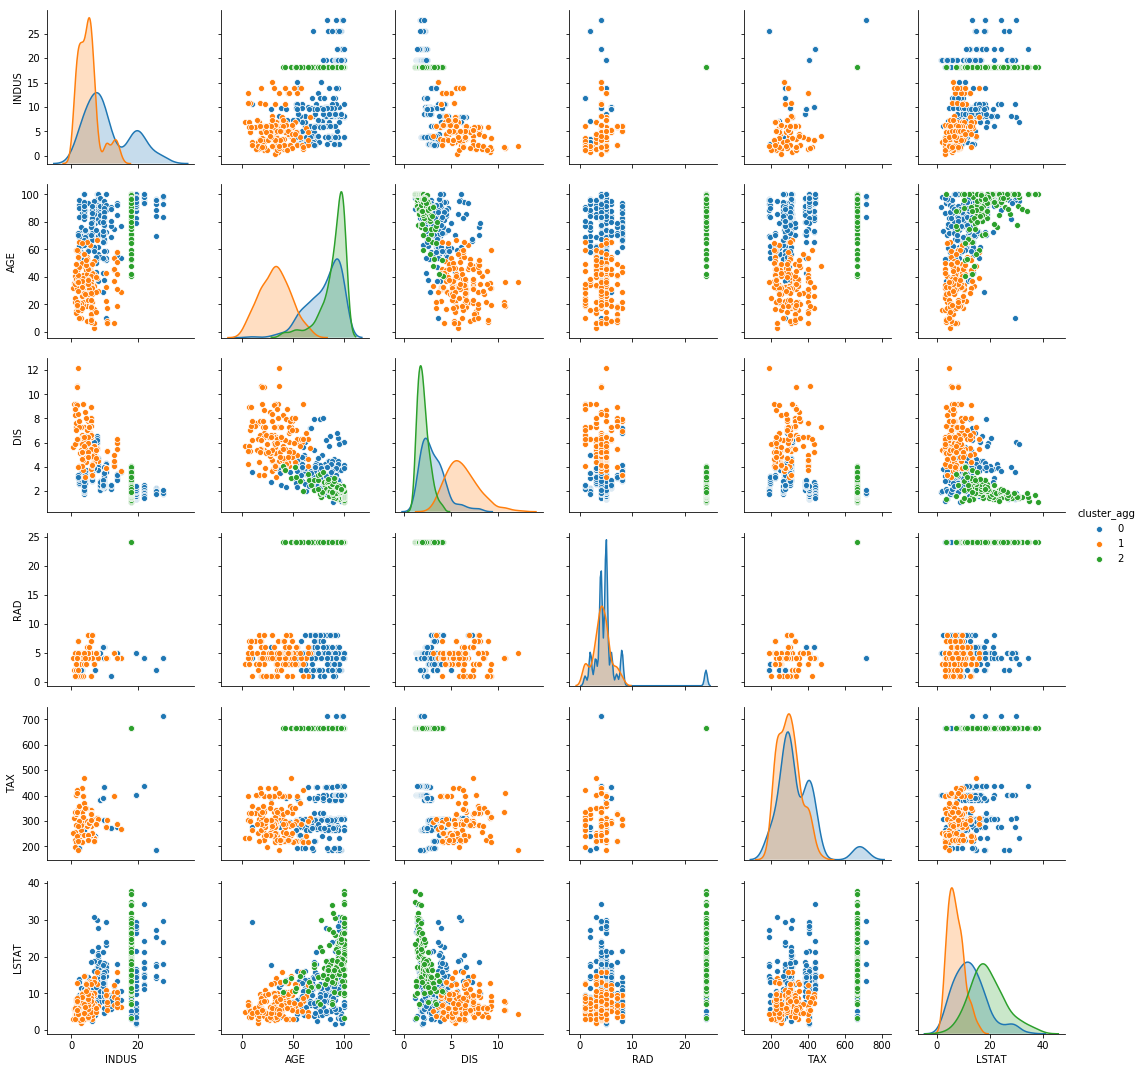

In [67]:
df['cluster_agg'] = agg.labels_
sns.pairplot(df, vars=cols, hue="cluster_agg") 

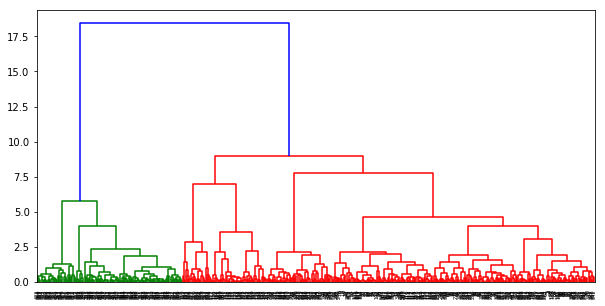

In [71]:
# Dendogramm
from scipy.cluster.hierarchy import ward, dendrogram

linkage_matrix = ward(X_scaled)
plt.figure(figsize=(10,5))
dendrogram(linkage_matrix)
plt.show()

In [83]:
pd.crosstab(df['cluster_kmeans'], df['cluster_agg'])

cluster_agg,0,1,2
cluster_kmeans,,,
0,186,3,0
1,13,0,124
2,31,149,0


In [74]:
#DBScan
from sklearn.cluster import DBSCAN

In [79]:
dbscan = DBSCAN(min_samples=4, eps=1)
dbscan.fit(X_scaled)

DBSCAN(algorithm='auto', eps=1, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=4, n_jobs=1, p=None)

In [80]:
counts = pd.Series(dbscan.labels_).value_counts()
print(counts)
print(counts.shape[0]-1)

0    471
1     27
2      8
dtype: int64
2


/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


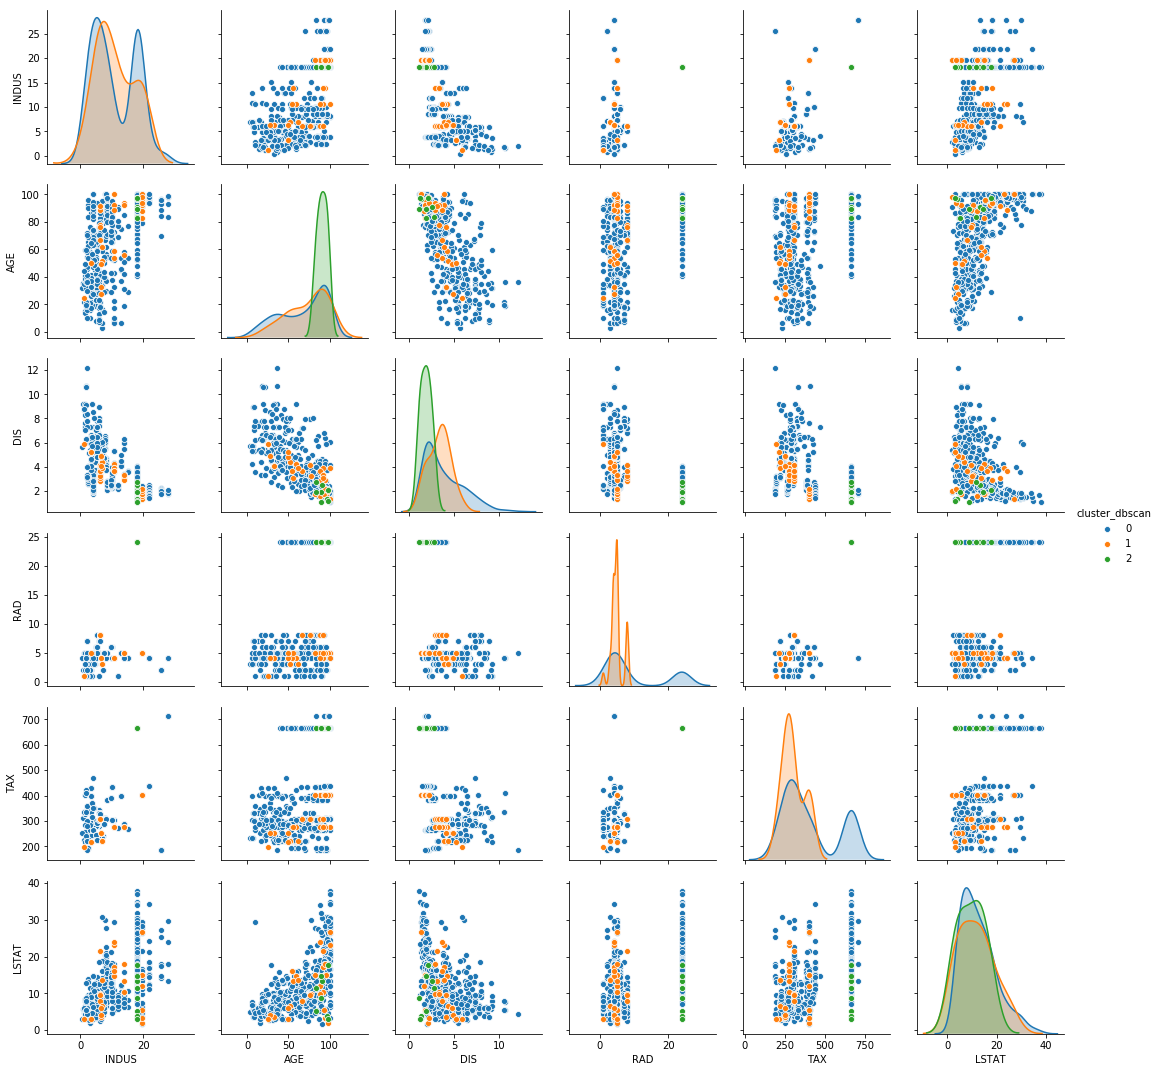

In [82]:
df['cluster_dbscan'] = dbscan.labels_
sns.pairplot(df, vars=cols, hue="cluster_dbscan")

In [ ]:
# dedupe
df recordlinkage.datasets import load_febrl1

# get rid od ducplicates!!!!!!!


